In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data=pd.read_csv('all_stocks_5yr.csv',parse_dates=True)

In [78]:
sbux=data[data['Name']=='SBUX'].copy()
sbux.head()


,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<Axes: >

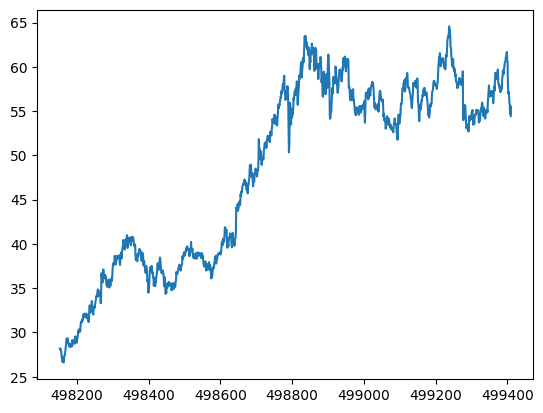

In [79]:
sbux['close'].plot()

In [80]:
sbux['prev_close']=sbux['close'].shift(1)

In [81]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [82]:
sbux['return']=sbux['close']/sbux['prev_close']-1

In [83]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [84]:
sbux['return2']=sbux['close'].pct_change(1)

In [85]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<Axes: >

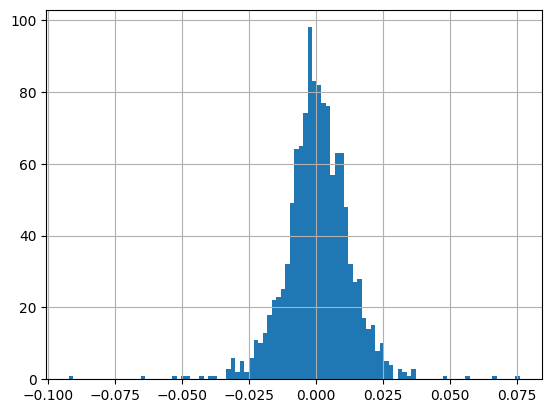

In [86]:
sbux['return'].hist(bins=100)

In [87]:
sbux['return'].mean(), sbux['return'].std()

(np.float64(0.0006002332205830914), np.float64(0.012360934026133879))

In [88]:
sbux['log_return']=np.log(sbux['return']+1)

In [89]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<Axes: >

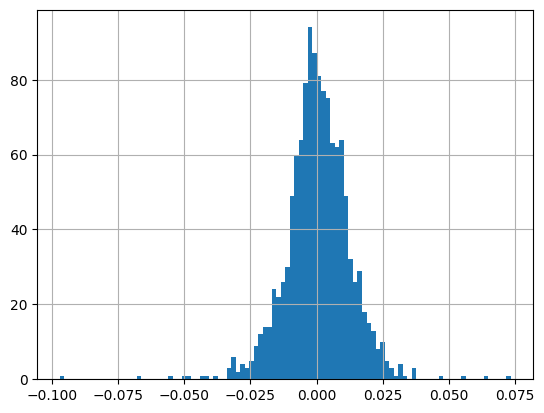

In [90]:
sbux['log_return'].hist(bins=100)

In [91]:
sbux['log_return'].mean(),sbux['log_return'].std()

(np.float64(0.0005235902748108682), np.float64(0.012381234216101258))

In [92]:
from scipy.stats import norm

In [93]:
x_list=np.linspace(sbux['return'].min(),sbux['return'].max(),100)

In [94]:
x_list

array([-0.09243697, -0.09073425, -0.08903152, -0.08732879, -0.08562606,
       -0.08392333, -0.0822206 , -0.08051787, -0.07881514, -0.07711241,
       -0.07540968, -0.07370696, -0.07200423, -0.0703015 , -0.06859877,
       -0.06689604, -0.06519331, -0.06349058, -0.06178785, -0.06008512,
       -0.05838239, -0.05667967, -0.05497694, -0.05327421, -0.05157148,
       -0.04986875, -0.04816602, -0.04646329, -0.04476056, -0.04305783,
       -0.0413551 , -0.03965238, -0.03794965, -0.03624692, -0.03454419,
       -0.03284146, -0.03113873, -0.029436  , -0.02773327, -0.02603054,
       -0.02432781, -0.02262509, -0.02092236, -0.01921963, -0.0175169 ,
       -0.01581417, -0.01411144, -0.01240871, -0.01070598, -0.00900325,
       -0.00730052, -0.0055978 , -0.00389507, -0.00219234, -0.00048961,
        0.00121312,  0.00291585,  0.00461858,  0.00632131,  0.00802404,
        0.00972677,  0.01142949,  0.01313222,  0.01483495,  0.01653768,
        0.01824041,  0.01994314,  0.02164587,  0.0233486 ,  0.02

In [95]:
y_list=norm.pdf(x_list,loc=sbux['return'].mean(),scale=sbux['return'].std())

In [96]:
y_list

array([1.61124038e-11, 4.50112662e-11, 1.23379004e-10, 3.31833649e-10,
       8.75706799e-10, 2.26754626e-09, 5.76119697e-09, 1.43624466e-08,
       3.51320317e-08, 8.43212896e-08, 1.98577642e-07, 4.58862527e-07,
       1.04038473e-06, 2.31453890e-06, 5.05235819e-06, 1.08213867e-05,
       2.27421141e-05, 4.68962254e-05, 9.48864233e-05, 1.88377661e-04,
       3.66955886e-04, 7.01386579e-04, 1.31540709e-03, 2.42059451e-03,
       4.37061993e-03, 7.74324810e-03, 1.34605388e-02, 2.29594165e-02,
       3.84253989e-02, 6.31008279e-02, 1.01674224e-01, 1.60748085e-01,
       2.49367520e-01, 3.79571066e-01, 5.66898683e-01, 8.30762588e-01,
       1.19455885e+00, 1.68537793e+00, 2.33316896e+00, 3.16923331e+00,
       4.22397530e+00, 5.52392360e+00, 7.08815312e+00, 8.92437177e+00,
       1.10250699e+01, 1.33642375e+01, 1.58952057e+01, 1.85501427e+01,
       2.12416130e+01, 2.38663972e+01, 2.63114858e+01, 2.84618428e+01,
       3.02092395e+01, 3.14612306e+01, 3.21492431e+01, 3.22347967e+01,
      

<Axes: >

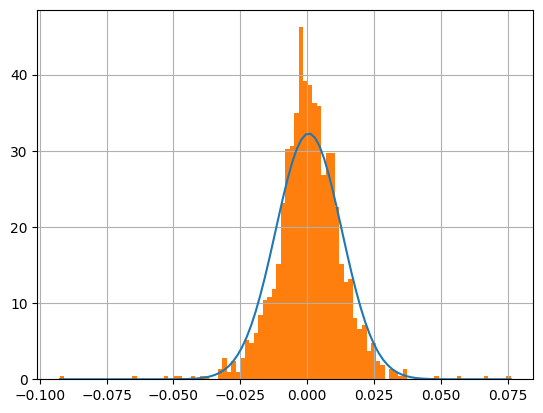

In [97]:
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

In [98]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (np.float64(0.012069021175478527),
  np.float64(0.0006002332205830934),
  np.float64(0.9745536080830227)))

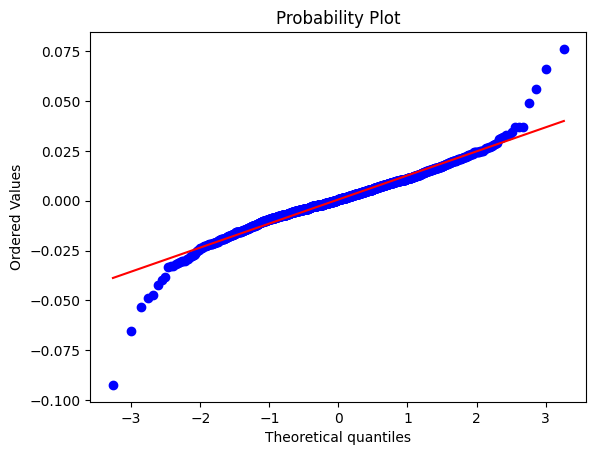

In [99]:
probplot(sbux['return'].dropna(),dist='norm',fit=True,plot=plt)

In [100]:
import statsmodels.api as sm

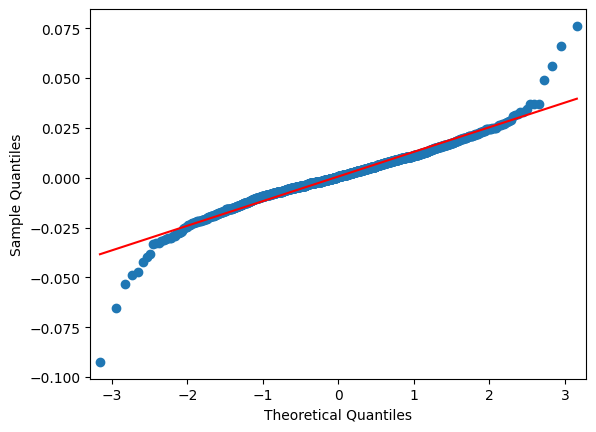

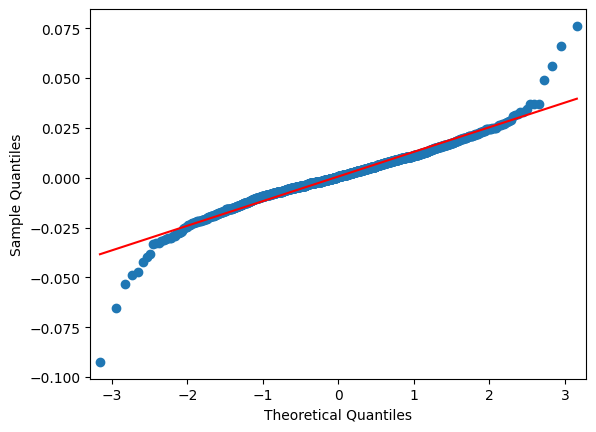

In [101]:
sm.qqplot(sbux['return'].dropna(),line='s')

In [102]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [103]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

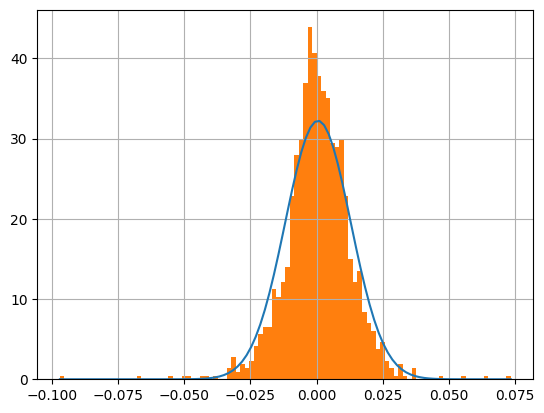

In [104]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

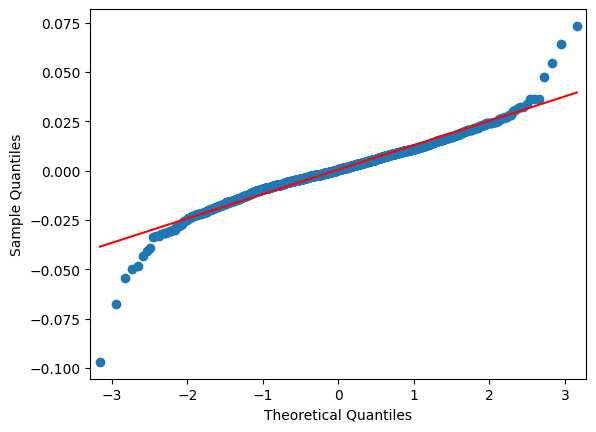

In [105]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

In [106]:
from scipy.stats import t

In [107]:
x_list=np.linspace(sbux['return'].min(),sbux['return'].max(),100)

In [108]:
x_list

array([-0.09243697, -0.09073425, -0.08903152, -0.08732879, -0.08562606,
       -0.08392333, -0.0822206 , -0.08051787, -0.07881514, -0.07711241,
       -0.07540968, -0.07370696, -0.07200423, -0.0703015 , -0.06859877,
       -0.06689604, -0.06519331, -0.06349058, -0.06178785, -0.06008512,
       -0.05838239, -0.05667967, -0.05497694, -0.05327421, -0.05157148,
       -0.04986875, -0.04816602, -0.04646329, -0.04476056, -0.04305783,
       -0.0413551 , -0.03965238, -0.03794965, -0.03624692, -0.03454419,
       -0.03284146, -0.03113873, -0.029436  , -0.02773327, -0.02603054,
       -0.02432781, -0.02262509, -0.02092236, -0.01921963, -0.0175169 ,
       -0.01581417, -0.01411144, -0.01240871, -0.01070598, -0.00900325,
       -0.00730052, -0.0055978 , -0.00389507, -0.00219234, -0.00048961,
        0.00121312,  0.00291585,  0.00461858,  0.00632131,  0.00802404,
        0.00972677,  0.01142949,  0.01313222,  0.01483495,  0.01653768,
        0.01824041,  0.01994314,  0.02164587,  0.0233486 ,  0.02

In [109]:
params=t.fit(sbux['return'].dropna())

In [110]:
params

(np.float64(4.78753221828017),
 np.float64(0.0007108616716254146),
 np.float64(0.009341981642040986))

In [111]:
df,log,scale=params

In [112]:
y_list=t.pdf(x_list,df,log,scale)


<Axes: >

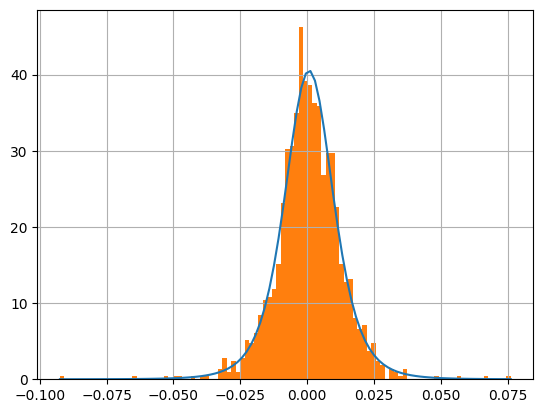

In [113]:
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

In [114]:
sm.qqplot(sbux['return'].dropna(), dist=t,line='s');

TypeError: t requires more parameters to compute ppf

In [115]:
probplot(sbux['return'].dropna(), dist='t', fit=True, plot=plt);

TypeError: _parse_args() missing 1 required positional argument: 'df'

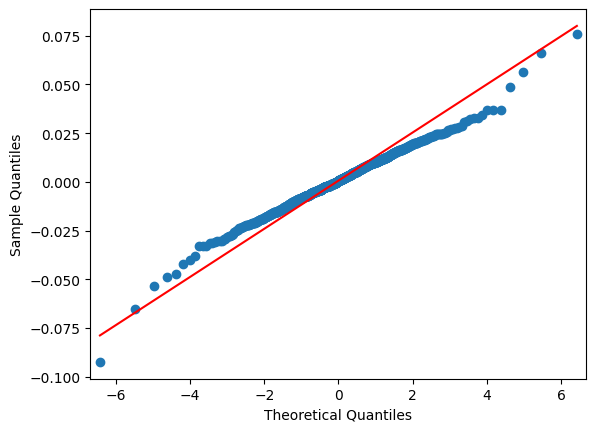

In [116]:
class myt:
  def __init__(self, df):
    self.df = df
  
  def fit(self, x):
    return t.fit(x)
  
  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s');

In [117]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [118]:
params = t.fit(sbux['log_return'].dropna())

In [119]:
df, loc, scale = params


In [120]:
y_list = t.pdf(x_list, df, loc, scale)

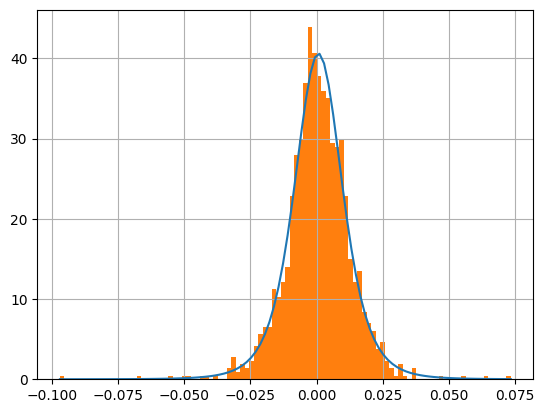

In [121]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

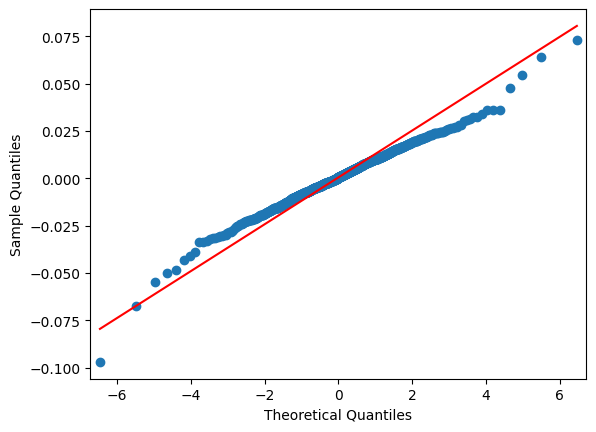

In [122]:
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s');

In [123]:
sbux['return'].skew()

np.float64(-0.2680784195824153)

In [124]:
sbux['return'].kurtosis()

np.float64(5.593158903424731)

In [125]:
sbux['log_return'].skew()

np.float64(-0.41015501490182066)

In [126]:
sbux['log_return'].kurtosis()

np.float64(5.964502225799283)

In [127]:
samp=pd.Series(np.random.rand(10000))

In [128]:
samp.skew(),samp.kurtosis()

(np.float64(-0.006438210000309917), np.float64(-1.2007323611165799))

In [129]:
values = sbux['return'].dropna().to_numpy()

In [130]:
values

array([-0.00408018,  0.00213751, -0.00764309, ..., -0.01936525,
        0.01682209, -0.02067973])

In [131]:
m=values.mean()
s=values.std(ddof=1)

In [132]:
low=m-1.96*s/np.sqrt(len(values))
high=m+1.96*s/np.sqrt(len(values))

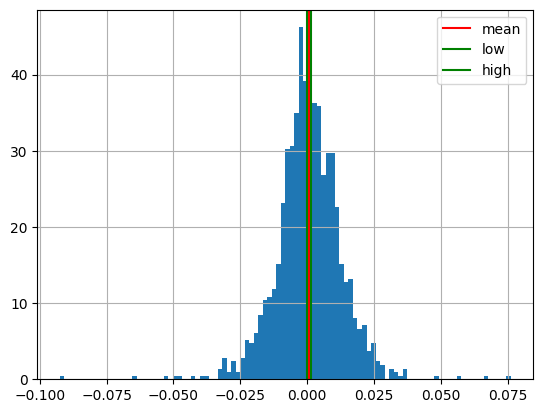

In [133]:
sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend();

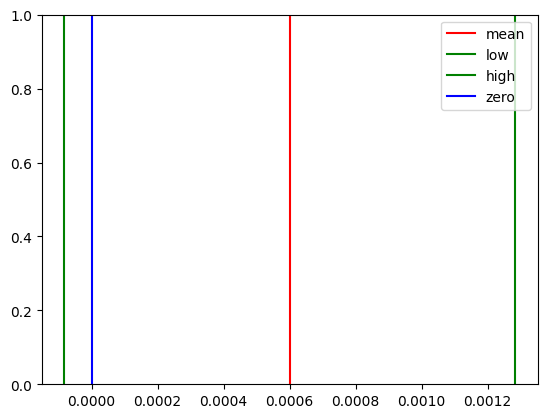

In [134]:
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();

In [135]:
from scipy.stats import jarque_bera, normaltest

In [136]:
jarque_bera(values)

SignificanceResult(statistic=np.float64(1639.028438655224), pvalue=np.float64(0.0))

In [137]:
normaltest(values)

NormaltestResult(statistic=np.float64(172.6819672061636), pvalue=np.float64(3.1811727900119636e-38))

In [138]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=np.float64(1882.1814629047703), pvalue=np.float64(0.0))

In [139]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=np.float64(198.54738937007733), pvalue=np.float64(7.690989175882069e-44))

In [140]:
from scipy.stats import kstest

In [141]:
df, loc, scale = t.fit(values)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=np.float64(0.01887566203844726), pvalue=np.float64(0.7537785475444063), statistic_location=np.float64(-0.0003257859586252021), statistic_sign=np.int8(1))

In [142]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

KstestResult(statistic=np.float64(0.01837990941957013), pvalue=np.float64(0.7818301159274575), statistic_location=np.float64(-0.0003258390383993639), statistic_sign=np.int8(1))

In [143]:
from scipy.stats import ttest_1samp

In [144]:
ttest_1samp(values, 0)

TtestResult(statistic=np.float64(1.7223010261810556), pvalue=np.float64(0.0852609871769454), df=np.int64(1257))

In [145]:
ttest_1samp(sbux['log_return'].dropna(), 0)

TtestResult(statistic=np.float64(1.4999195047533647), pvalue=np.float64(0.13388636615667793), df=np.int64(1257))

In [146]:
mmm = data[data['Name'] == 'MMM'].copy()

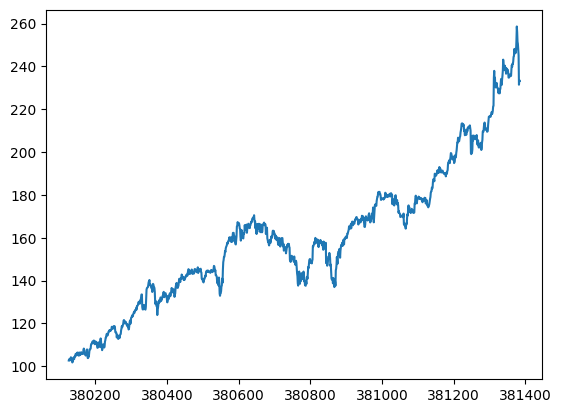

In [147]:
mmm['close'].plot();

In [148]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [149]:
mmm['return'].mean(), mmm['return'].std()

(np.float64(0.0007001182500580143), np.float64(0.009768718404053094))

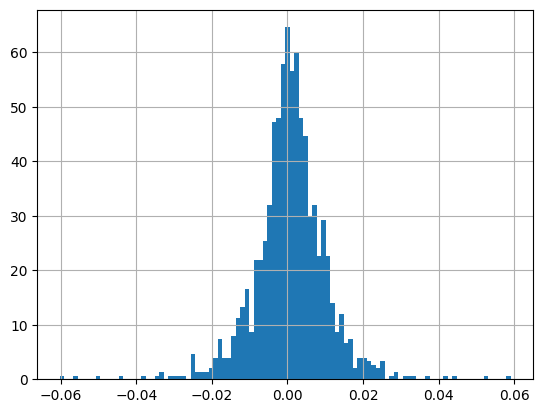

In [150]:
mmm['return'].hist(bins=100, density=True);

In [151]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


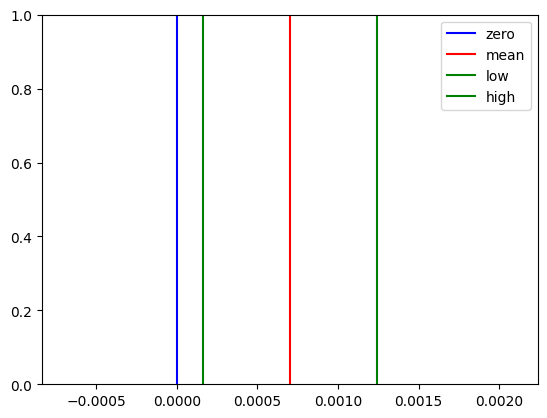

In [152]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue');
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend()

In [153]:
ttest_1samp(mmm['return'].dropna(), 0)


TtestResult(statistic=np.float64(2.541991701703365), pvalue=np.float64(0.011141496531324404), df=np.int64(1257))

In [154]:
ttest_1samp(mmm['log_return'].dropna(), 0)

TtestResult(statistic=np.float64(2.365963115873947), pvalue=np.float64(0.018134246809755054), df=np.int64(1257))

In [155]:
close = pd.read_csv('sp500_close.csv')

975

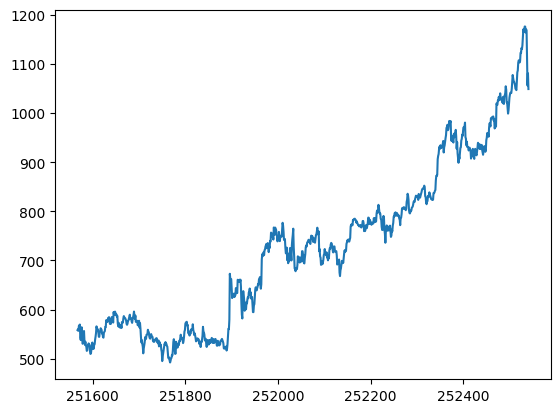

In [156]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot();
len(goog)

In [158]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [159]:
sub.dropna(axis=0, how='all', inplace=True)

In [162]:
for symbol in symbols:
  sub[symbol + '_prev'] = sub[symbol].shift(1)
  sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [163]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [165]:
rets.head()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015


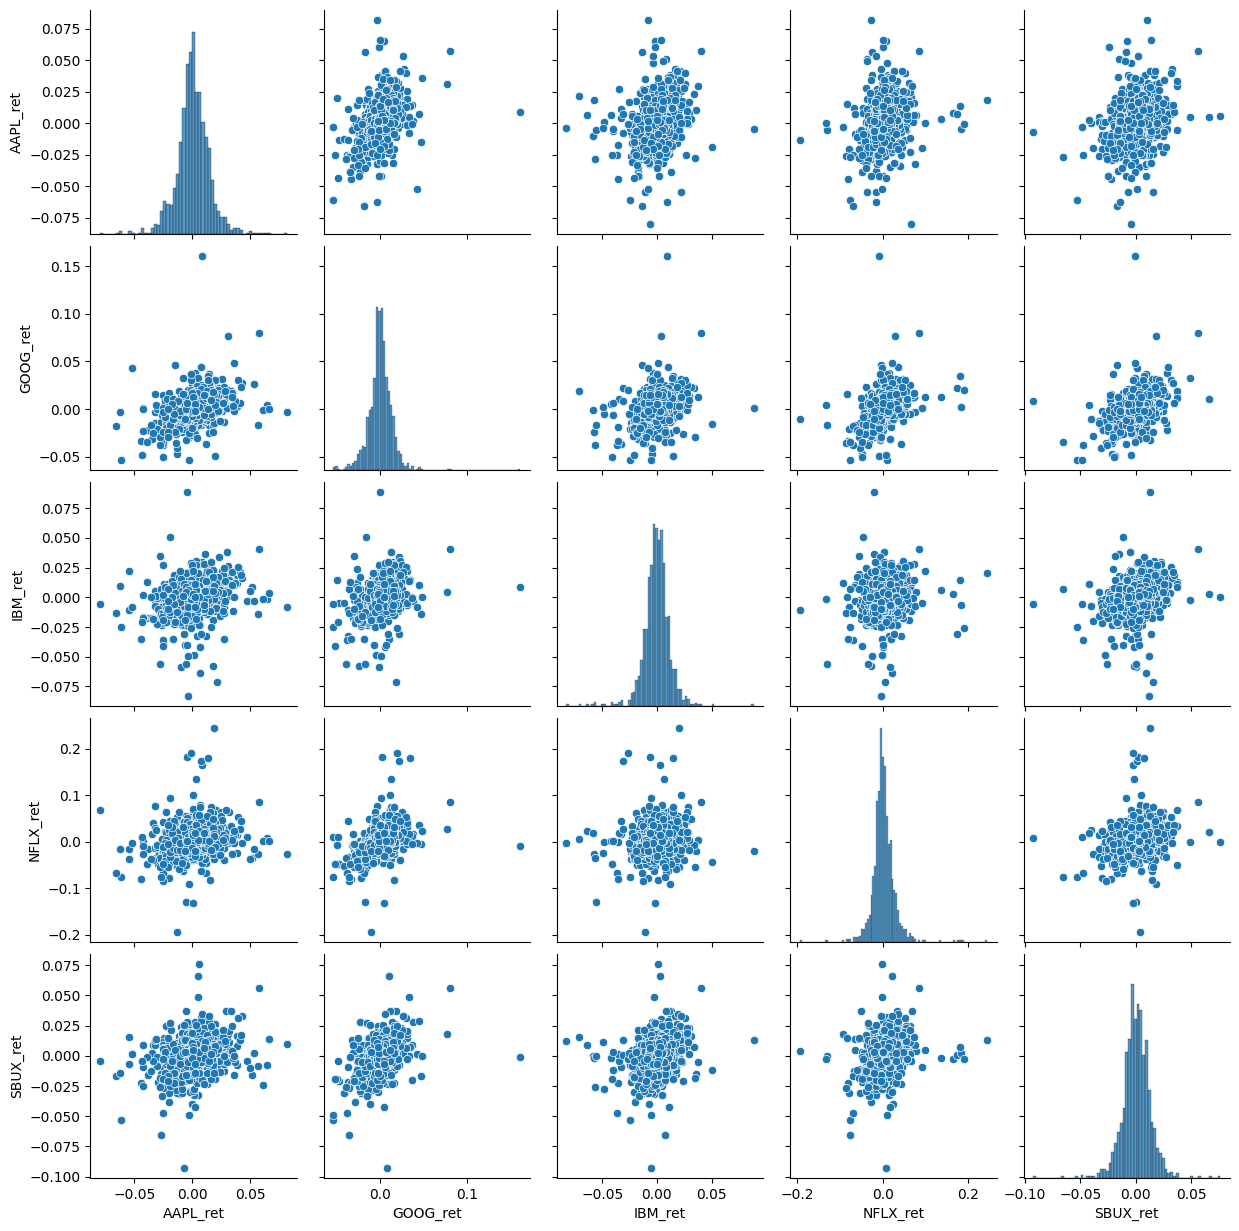

In [166]:
import seaborn as sns
sns.pairplot(rets);

In [167]:
rets.mean()


AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [168]:
rets.std()


AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

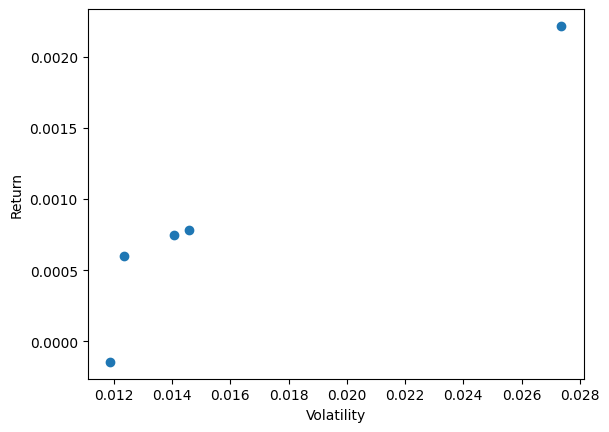

In [169]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('Volatility')
plt.ylabel('Return');

In [170]:
rets.corr()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,1.000000,0.415487,0.263927,0.227387,0.307716
GOOG_ret,0.415487,1.000000,0.345643,0.404768,0.455936
IBM_ret,0.263927,0.345643,1.000000,0.163267,0.315263
NFLX_ret,0.227387,0.404768,0.163267,1.000000,0.266012
SBUX_ret,0.307716,0.455936,0.315263,0.266012,1.000000


In [171]:
rets.cov()

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
AAPL_ret,0.000213,0.000084,0.000046,0.000091,0.000056
GOOG_ret,0.000084,0.000198,0.000058,0.000151,0.000079
IBM_ret,0.000046,0.000058,0.000141,0.000053,0.000046
NFLX_ret,0.000091,0.000151,0.000053,0.000748,0.000090
SBUX_ret,0.000056,0.000079,0.000046,0.000090,0.000153
